# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = soup(html, "html.parser")

In [5]:
# Find the table
table = mars_soup.find('table', class_='table')
# Extract all rows of data
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
rows_list = []

# Loop through the scraped data to create a list of rows 'rows_list'
for row in rows:
    rows_list.append(row.text.strip())
rows_list.remove(rows_list[0])

# Loop through 'rows_list' and split each value into seperate indexes
row_values = []
for item in rows_list:
    row_values.append(item.split("\n"))

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_list =['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_df = pd.DataFrame(row_values, columns = column_list)
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
# Examine data type of each column
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [10]:
# Change data types for data analysis

#Import DateTime dependency
from datetime import datetime as dt

# Convert 'terrestrial_date' to datetime object
mars_df['terrestrial_date']= pd.to_datetime(mars_df['terrestrial_date'])

#Convert 'sol','ls',and 'month' columns to int objects/'min_temp' and 'pressure' columns to float objects
df = mars_df.astype({"sol":"int","ls":"int", "month":"int", "min_temp":"float", "pressure":"float"})

In [11]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
df.groupby(df['month'])['id'].count()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: id, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?
print(f"How many Martian days' worth of data are there?: {len(df)}")

How many Martian days' worth of data are there?: 1867


In [16]:
# 3. What is the average low temperature by month?
avg_temp= df.groupby(df['month'])['min_temp'].mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

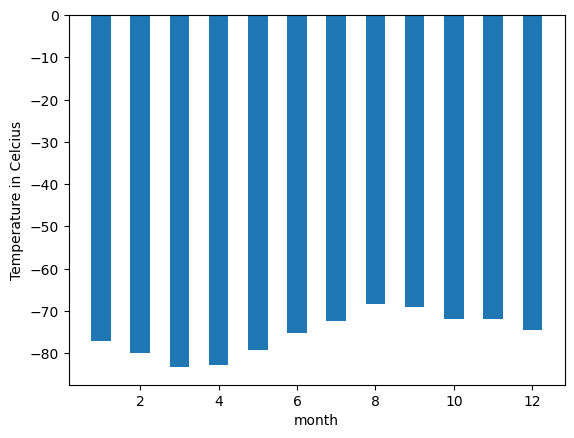

In [17]:
# Plot the average temperature by month

# Create an array of each unique value in 'month' column
months = df['month'].unique()

# Convert 'months' array to list
month_list = months.tolist()

# Convert 'months_list' values to float
month_values = [float(x) for x in month_list]
sorted_month_value = month_values.sort(reverse=False)

# Plot the lists
plt.bar(month_values, avg_temp, width = .5);
plt.xlabel("month");
plt.ylabel("Temperature in Celcius");

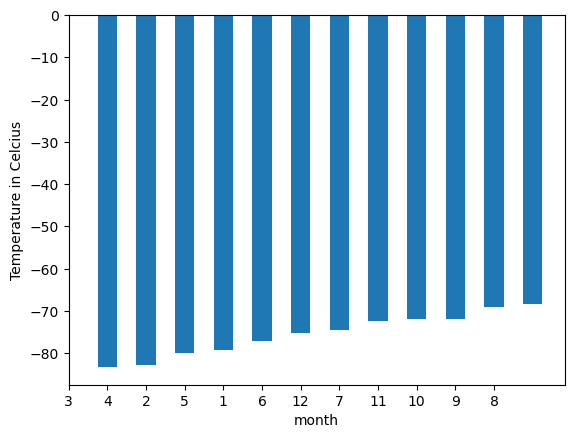

Coldest month in Curiosity's location: Month 3
Hottest month in Curiosity's location: Month 8


In [18]:
# Identify the coldest and hottest months in Curiosity's location

# Sort the average temperatures 'avg_temp' from greatest to lowest
sorted_temps = avg_temp.sort_values()
x = [3,4,2,5,1,6,12,7,11,10,9,8]

# Plot the lists
plt.bar(month_values, sorted_temps, width = .5);
plt.xlabel("month");
plt.ylabel("Temperature in Celcius");

# Plot x values in order of the months sorted by temperature (highest to lowest)
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)
plt.show()

print(f"Coldest month in Curiosity's location: Month {x[0]}")
print(f"Hottest month in Curiosity's location: Month {x[-1]}")

In [19]:
# 4. Average pressure by Martian month
avg_pressure = df.groupby(df['month'])['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

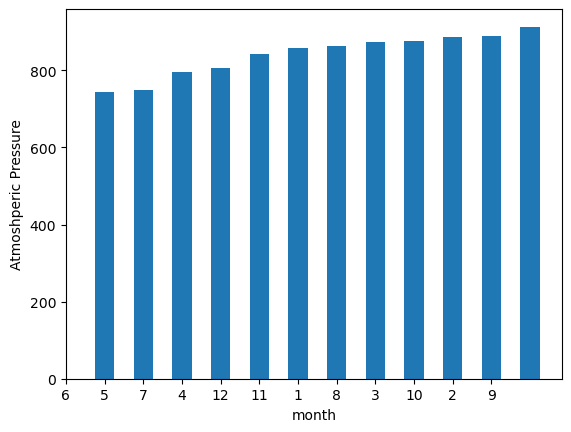

Lowest pressure month in Curiosity's location: Month 6
Highest pressure month in Curiosity's location: Month 9


In [20]:
# Plot the average pressure by month

# Sort the average temperatures 'avg_temp' from greatest to lowest
sorted_pressures = avg_pressure.sort_values()
x2 = [6,5,7,4,12,11,1,8,3,10,2,9]

# Plot the 'month_values' list (months) and 'avg_pressure' list (pressures in order)
plt.bar(month_values, avg_pressure.sort_values(), width = .5);
plt.xlabel("month");
plt.ylabel("Atmoshperic Pressure");

# Plot x values in order of the months sorted by pressure (highest to lowest)
default_x_ticks = range(len(x2))
plt.xticks(default_x_ticks, x2)
plt.show()

print(f"Lowest pressure month in Curiosity's location: Month {x2[0]}")
print(f"Highest pressure month in Curiosity's location: Month {x2[-1]}")

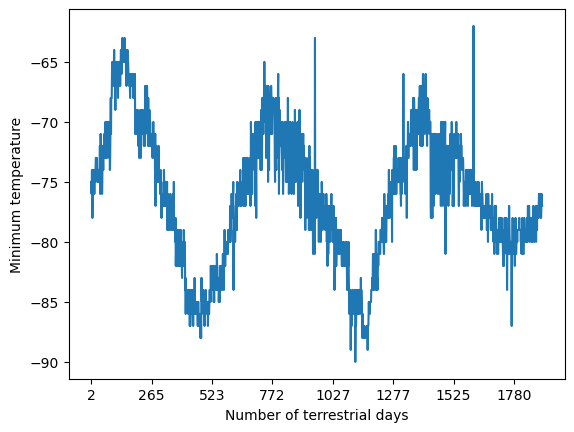

In [21]:
# 5. How many terrestrial (earth) days are there in a Martian year?
import numpy as np

plt.plot(df['id'], df['min_temp'])
plt.xlabel("Number of terrestrial days");
plt.ylabel("Minimum temperature");
x_axis = np.arange(len(df))
tick_locations = plt.xticks(x_axis[::250], df['id'].values[::250])


The third month on Mars has the coldest average temperature at around -83.307292 degrees celcius while the eighth months is the warmest with an average monthly temperature of around -68.382979 degrees celcius. Theses temperature are still colder than any temperatures ever felt on Earth.

In terms of average atmospheric pressure, the sixth month has the lowest average pressure while the ninth month has the highest. These average monthly pressures are 745.054422 and 913.305970 respectively.


Finally in terms of days in a year on mars, the average minimum temperature on Mars peaks about every 675 days. We came to this determination using the plot above and measuring the distance (days) between peaks. Using this information we can infer that a year on Mars equates to about 675 Earth days.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [69]:
# Write the data to a CSV
df.to_csv("Data/mars_df.csv", index=False)

In [22]:
browser.quit()